In [104]:
import numpy as np

# Set the parameters
population_size = 100000
sample_size = 50
num_samples = 100

# Generate a random representative sample of salaries (in thousands)
# You should replace this with actual collected salary data
np.random.seed(42)  # Setting a seed for reproducibility
population_salaries = np.random.lognormal(mean=4.5, sigma=0.8, size=population_size)

# Generate multiple samples and calculate the sample means and standard deviations
sample_means = []
sample_std_devs = []

for _ in range(num_samples):
  sample_salaries = np.random.choice(population_salaries, size=sample_size)
  sample_means.append(np.mean(sample_salaries))
  sample_std_devs.append(np.std(sample_salaries))

# Calculate the average of the sample means and the standard error
average_sample_means = np.mean(sample_means)
standard_error = np.std(sample_means) / np.sqrt(num_samples)

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
lower_limit = average_sample_means - margin_of_error
upper_limit = average_sample_means + margin_of_error

# Report the results
print(f"Estimated average salary (in thousands): {average_sample_means:.2f}")
print(f"95% confidence interval (in thousands): ({lower_limit:.2f}, {upper_limit:.2f})")


Estimated average salary (in thousands): 124.74
95% confidence interval (in thousands): (121.23, 128.26)


Fare of titanic dataset

In [105]:
import pandas as pd

In [106]:
train = pd.read_csv(r'C:\Users\alisa\OneDrive\Desktop\Math\titanic-train.csv')

In [107]:
test=pd.read_csv(r'C:\Users\alisa\OneDrive\Desktop\Math\titanic-test.csv')

In [108]:
test.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


In [109]:
train.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S


In [110]:
df=pd.concat([train.drop(columns=['Survived']),test]).sample(1309)

In [111]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
278,279,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
352,353,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
163,1055,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
188,189,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
600,601,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
348,349,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S


<Axes: ylabel='Density'>

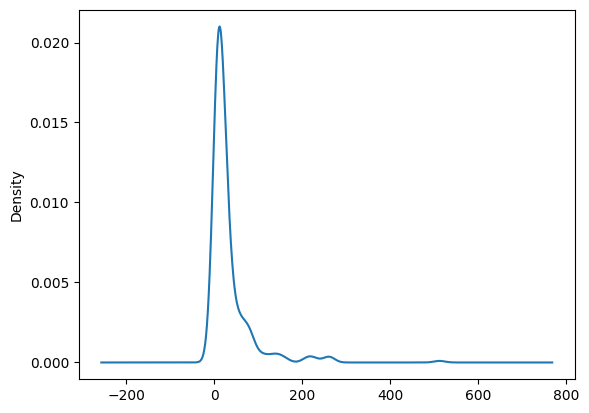

In [112]:
df['Fare'].plot(kind='kde')

This plot looks like right skewed i.e maximum pasenger ka fare kam hai or kuch ka jyada.

Lekin CLT ko kuch fark nahi padega ke population ka distribution kaisa hai

In [120]:
# sample size = 50 ->100 times (30< illigal)
samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [121]:
len(samples)

100

In [122]:
samples = np.array(samples)

In [123]:
sampling_means = samples.mean(axis=1) # 100 means aa gaye
sampling_means

array([29.855666, 43.258336, 36.862582, 46.183002, 40.270916, 48.376162,
       36.570498, 34.319834, 38.279084, 47.57175 , 20.828   , 26.465582,
       31.012914, 21.489334, 33.452498, 38.118998, 28.056086, 41.421414,
       37.84058 , 27.277748, 29.489666, 29.073416, 31.118332, 47.2795  ,
       52.621832, 45.89433 , 41.398748, 30.70242 , 37.918082, 28.689084,
       38.07991 , 41.420082, 26.957248, 33.206834, 30.935748, 31.5615  ,
       26.577084, 38.72175 , 32.796758, 41.883246, 25.39783 , 29.318752,
       25.031832, 26.929916, 51.842166, 34.413168, 40.92417 , 31.112   ,
       38.031332, 30.571582, 44.605334, 33.237086, 36.496494, 40.020166,
       30.523834, 39.39092 , 37.067582, 39.819506, 33.795252, 24.278834,
       34.148076, 33.102998, 35.088002, 44.48175 , 25.028162, 35.549416,
       39.710664, 32.06625 , 23.421086, 28.295248, 37.580498, 50.072836,
       33.360418, 35.638918, 28.842664, 35.096754, 30.306336, 32.865662,
       20.580332, 40.408334, 34.560332, 52.597332, 

<Axes: ylabel='Density'>

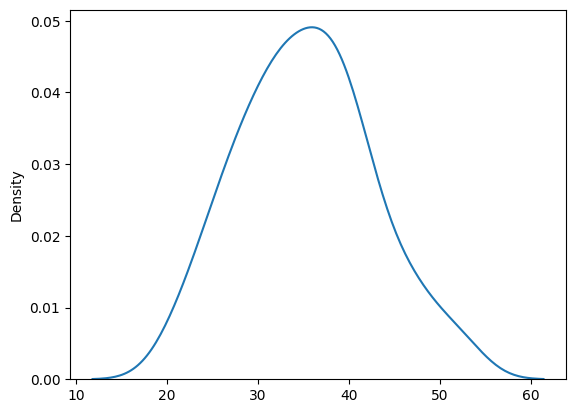

In [124]:
import seaborn as sns
sns.kdeplot(sampling_means) # normal distribution

Normal distribution, Q ki this follow Central Limit Theorem

hum kia karne nikle the?

population ka mean nikal na tha ham ko, by using  on sampling distribution of mean  

In [125]:
sampling_means.mean()

35.27912552

In [126]:
sampling_means.std()/np.sqrt(50)

1.034693854428006

In [ ]:
lower_limit = sampling_means.mean() - 2*sampling_means.std()
upper_limit = sampling_means.mean() + 2*sampling_means.std()

In [ ]:
print('The range is',lower_limit,'-',upper_limit) # this is correct

The range is 20.646344701638213 - 49.91190633836179


In [129]:
df['Fare'].dropna().mean()

33.295479281345564

In [135]:
lower_limit = sampling_means.mean() - sampling_means.std()/np.sqrt(50)
upper_limit = sampling_means.mean() + sampling_means.std()/np.sqrt(50)

In [ ]:
print('The range is',lower_limit,'-',upper_limit) # correct hai lekin har case me nahi

The range is 34.244431665571994 - 36.31381937442801


In [137]:
df['Fare'].dropna().mean()

33.295479281345564